This exercies has an implementation on an arbitrary length network defined by you the user. This network was written for 
$$ Y = w_n(cos(w_{n-1}*z_{n-1})) $$
Where $$ z_{n-1} = (cos(w_{n-2}*z_{n-2})) $$
starting with $z_0$
This first block just initiallizes some random weights to train both the residual and nonresidual network.

In [82]:
import numpy as np

X = 3.
Y = 6.

numnodes = 3

eta = 1.0e-4

nodeval = np.random.rand(numnodes)
nodeval[0] = X

weights = np.random.rand(numnodes-1)
nodegrad = np.random.rand(numnodes-1)
bias = np.random.rand(numnodes-1)

nodeval_1 = nodeval + 0
weights_1 = weights + 0
nodegrad_1 = nodegrad + 0
bias_1 = nodegrad + 0 

nodeval_res = nodeval + 0
weights_res = weights + 0
nodegrad_res = nodegrad + 0
bias_res = bias + 0 

This defines forward and backward modes for these derivatives. I'm about 80 percent sure this is right.

In [73]:
def forward(nodes, weights, bias):

    for i in range(len(nodes)-2):
        nodenext = np.sin(weights[i]*nodes[i]+bias[i])
        nodes[i+1] = nodenext
    
        grad = np.cos(weights[i]*nodes[i])*weights[i]
        nodegrad[i+1] = grad
    
    nodes[-1] = weights[-1]*nodes[-2] + bias[-1]
    nodegrad[-1] = weights[-1]
    
    return nodes, nodegrad


def backward(nodes, weights, bias, nodegrad, seed):
    
    gradientw = []
    gradientb = []
    
    gradienttot = seed
    gradientw.append(gradienttot*nodes[-2])
    gradientb.append(gradienttot)
    
    for i in range(len(nodegrad)-1):
        gradienttot *= nodegrad[-(i+2)]
        gradientw.append(gradienttot*nodes[-(3+i)]*np.cos(nodes[-(3+i)]*weights[-(2+i)]))
        gradientb.append(gradienttot*nodes[-(3+i)]*np.cos(nodes[-(3+i)]*weights[-(2+i)])+bias[-(2+i)])
        
    gradientw = np.array(gradientw)
    gradientb = np.array(gradientb)
    
    return gradientw[::-1], gradientb[::-1]

def dL(out, target):
    L = (out - target)**2
    dL = 2*(out - target)
    return L, dL

In [74]:
for i in range(100000):
    nodeval_1, nodegrad_1 = forward(nodeval_1, weights_1, bias_1)
    
    loss, lossgrad = dL(nodeval_1[-1], Y)
    
    gradientsw, gradientsb = backward(nodeval_1, weights_1, bias_1, nodegrad_1, lossgrad)
    
    weights_1 -= gradientsw*eta
    bias_1 -= gradientsb*eta
    
    if i%10000 == 0:
        print(loss)
    
print(nodeval)
print(nodeval_1)
nodeval_1, nodegrad_1 = forward(nodeval_1, weights_1, bias_1)
print('Target = ', Y, ' Guess = ', nodeval_1[-1])
    

26.309553405035324
0.13857684422328628
0.16950202566059522
0.09672454201713003
0.029090353288521872
0.005969590392474782
0.0009942058371652856
0.00014863967069778908
2.1065433184401035e-05
2.910388933219156e-06
[3.00000000e+00 8.81896503e-01 7.19620158e-01 9.66389971e-01
 5.07635547e-01 3.00403683e-01 5.49500573e-01 9.30818717e-01
 5.20761437e-01 2.67207032e-01 8.77398789e-01 3.71918749e-01
 1.38335000e-03 2.47685022e-01 3.18233509e-01 8.58777468e-01
 4.58503167e-01 4.44587288e-01 3.36102266e-01 8.80678123e-01
 9.45026777e-01 9.91890329e-01 3.76741267e-01 9.66147446e-01
 7.91879570e-01 6.75689148e-01 2.44889479e-01 2.16457261e-01
 1.66047825e-01 9.22756610e-01]
[3.00000000e+00 7.72181139e-01 3.42806694e-01 1.68566682e-01
 1.30813786e-01 1.10253701e-01 1.53676176e-02 6.57667612e-03
 5.57136707e-03 4.57064372e-03 5.07778598e-04 8.45102686e-05
 3.53485610e-05 1.09702102e-05 2.29486774e-05 3.62897026e-05
 4.45325456e-05 3.31126617e-05 1.97758223e-05 2.16332050e-05
 2.40024382e-05 3.1898667

Well, that isn't the best. Let's try a residual implementation where $$ Y = w_n(cos(w_{n-1}*z_{n-1})) + z_{n-1}$$
Where $$ z_{n-1} = (cos(w_{n-2}*z_{n-2})) + z_{n-2} $$
starting with $z_0$

In [75]:
def forward_res(nodes, weights, bias):

    for i in range(len(nodes)-2):
        nodenext = np.sin(weights[i]*nodes[i]+bias[i]) + nodes[i]
        nodes[i+1] = nodenext
    
        grad = np.cos(weights[i]*nodes[i])*weights[i] + 1
        nodegrad[i+1] = grad
    
    nodes[-1] = weights[-1]*nodes[-2] + nodes[-2] + bias[-1]
    nodegrad[-1] = weights[-1] + 1
    
    
    return nodes, nodegrad


def backward_res(nodes, weights, bias, nodegrad, seed):
    
    gradientw = []
    gradientb = []
    
    gradienttot = seed
    gradientw.append(gradienttot*nodes[-2])
    gradientb.append(gradienttot)
    
    for i in range(len(nodegrad)-1):
        gradienttot *= nodegrad[-(i+2)]
        gradientw.append(gradienttot*nodes[-(3+i)]*np.cos(nodes[-(3+i)]*weights[-(2+i)]))
        gradientb.append(gradienttot*nodes[-(3+i)]*np.cos(nodes[-(3+i)]*weights[-(2+i)])+bias[-(2+i)])
        
    gradientw = np.array(gradientw)
    gradientb = np.array(gradientb)
    
    return gradientw[::-1], gradientb[::-1]


In [76]:
for i in range(100000):
    nodeval_res, nodegrad_res = forward_res(nodeval_res, weights_res, bias_res)
    
    loss, lossgrad = dL(nodeval_res[-1], Y)

    gradientsw, gradientsb = backward_res(nodeval_res, weights_res, bias_res, nodegrad_res, lossgrad)
    
    weights_res -= gradientsw*eta
    bias_res -= gradientsb*eta
    
    if i%10000 == 0:
        print(loss)
        
print(nodeval)
print(nodeval_1)
nodeval_res, nodegrad_res = forward_res(nodeval_res, weights_res, bias_res)
print('Target = ', Y, ' Guess = ', nodeval_res[-1])

27.720854886672477
4.645174036892062e-05
5.815911595448678e-06
8.251133774849137e-07
1.2405929668301923e-07
1.9101953333487257e-08
2.9694566019575477e-09
4.6337951146018647e-10
7.242031581917943e-11
1.1325286136131894e-11
[3.00000000e+00 8.81896503e-01 7.19620158e-01 9.66389971e-01
 5.07635547e-01 3.00403683e-01 5.49500573e-01 9.30818717e-01
 5.20761437e-01 2.67207032e-01 8.77398789e-01 3.71918749e-01
 1.38335000e-03 2.47685022e-01 3.18233509e-01 8.58777468e-01
 4.58503167e-01 4.44587288e-01 3.36102266e-01 8.80678123e-01
 9.45026777e-01 9.91890329e-01 3.76741267e-01 9.66147446e-01
 7.91879570e-01 6.75689148e-01 2.44889479e-01 2.16457261e-01
 1.66047825e-01 9.22756610e-01]
[3.00000000e+00 7.72181137e-01 3.42806690e-01 1.68566676e-01
 1.30813780e-01 1.10253692e-01 1.53676128e-02 6.57667244e-03
 5.57136115e-03 4.57063757e-03 5.07774001e-04 8.45090393e-05
 3.53472230e-05 1.09692787e-05 2.29464528e-05 3.62860812e-05
 4.45280967e-05 3.31093515e-05 1.97738453e-05 2.16310417e-05
 2.40000380e-0

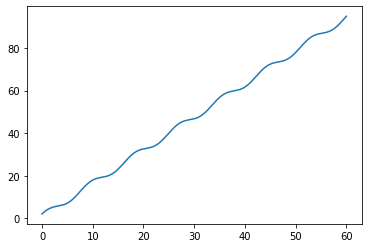

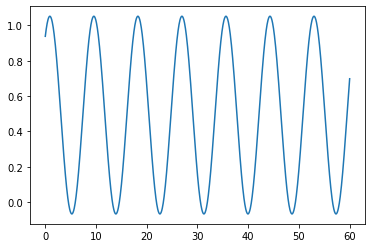

In [83]:
check = np.linspace(0, 60, 1000)
empty = np.zeros(numnodes)
values = []

for i in check:
    empty[0] = i
    n, g = forward_res(empty, weights_res, bias_res)
    values.append(n[-1])

plt.plot(check, values)

values = []

for i in check:
    empty[0] = i
    n, g = forward(empty, weights_1, bias_1)
    values.append(n[-1])


plt.figure()
plt.plot(check, values)
plt.show()

Assuming, I implemented this correctly, just increadible.

I was trying to get this to work with T-money's autodiff, but was failing. It would be more general and fun if we can get it working. 

In [1]:
import numpy as np

class Constant:
    
    def __init__(self, a):
        # Initialize the value of this variable with the value passed in
        self.a_value = a
        # to make sure our children don't throw an exception when they access our grad variable 
        # as in backward() in the BinaryAdd()
        self.grad = 0
    
    def forward(self):
        # what should this return?
        # TODO: fill in the return value
        # Remember this is the last node of the graph.
        return self.a_value
    
    def backward(self):
        # What should go here if it's a constant?
        # Nothing. We want the backpropagation to stop here. 
        # In python, we use pass as shorthand for "return None".
        # Doing this means we can inject constants at any point in the computational graph.
        pass

class BinaryAdd:
    
    def __init__(self, a, b):
        # record the two parents of the binary add
        self.a = a
        self.b = b
        # and initialize the gradient to 0.
        self.grad = 0
        
    def forward(self):
        # a _value and b_value
        # are intermediate values in the computational graph
        # like v4 in Table 3 in the paper.
        # We don't have to store the value of a or b, 
        # but caching them now means we don't have to recompute them on the backward pass.
        self.a_value = self.a.forward()
        self.b_value = self.b.forward()
        return self.a_value + self.b_value
    
    def backward(self):
        # z = a + b
        # dz/da = ?
        # TODO: fill in the None values.
        # Remember, a and b are the parents of this object. 
        dzda = 1
        dzdb = 1
        self.a.grad += dzda*self.grad
        self.b.grad += dzdb*self.grad

class BinaryMul:
    
    def __init__(self, a, b):
        self.a = a
        self.b = b
        self.grad = 0
        # TODO: what's missing? What other value do we have to store in a node?
        
    
    def forward(self):
        # again, we don't have to cache self.a_value or self.b_value
        # but it makes the backward pass not have to call a.forward() or b.forward()
        # TODO: fill in None
        self.a_value = self.a.forward()
        self.b_value = self.b.forward()
        return self.a_value * self.b_value

    def backward(self):
        # TODO: fill in the gradient values below (dzda, dzdb)
        # z = a*b 
        # dz/da = ?
        dzda = self.b_value
        dzdb = self.a_value
        self.a.grad += dzda*self.grad
        self.b.grad += dzdb*self.grad
        
class Ln:
    
    def __init__(self, a):
        self.a = a
        self.grad = 0

    def forward(self):
        # TODO: fill me in
        self.a_value = self.a.forward()
        return np.log(self.a_value)
    
    def backward(self):
        # TODO: fill me in
        # z = ln(a)
        # dz/da = ?
        self.a.grad += 1/self.a_value*self.grad

        
class Sin:
    
    def __init__(self, a):
        self.a = a
        self.grad = 0
        
    def forward(self):
        # TODO: fill me in
        self.a_value = self.a.forward()
        return np.sin(self.a_value)
    
    def backward(self):
        # TODO: fill me in 
        # z = sin(a)
        # dz/da = ?
        self.a.grad += np.cos(self.a_value)*self.grad


class BinarySub:
    
    def __init__(self, a, b):
        # TODO:
        # record the two parents of the binary subtract
        self.a = a
        self.b = b
        # and initialize the gradient to 0.
        self.grad = 0
        
    def forward(self):
        # TODO: How do I get a and b?
        self.a_value = self.a.forward()
        self.b_value = self.b.forward()
        return self.a_value - self.b_value
    
    def backward(self):
        # z = a - b
        # dz/da = ?
        # TODO: fill in the None values.
        # Remember, a and b are the parents of this object. 
        dzda = 1
        dzdb = -1
        self.a.grad += dzda*self.grad
        self.b.grad += dzdb*self.grad  # Why is this a += operator?

In [7]:
X = Constant(3)
Y = 2.

w1 = Constant(.4)
w2 = Constant(.1)

v1 = BinaryMul(X, w1)
v2 = Sin(v1)
v3 = BinaryMul(v2, w2)

eta = 1.0e-5

for i in range(100000):

    y = v3.forward()
    
    #print('y: {}'.format(y))
    #print(.5*np.sin(.4*4))

    # TODO: seed the gradient value
    v3.grad = 2*(y - Y) 
    v3.backward()

    # Instead of calling backward() on each node by hand, put the nodes in 
    # a list and iterate over it backwards.

    ls = [X, w1, v1, v2, w2]

    for node in ls[::-1]:
        #print(node.grad)
        node.backward()
    
    w1.a_value -= w1.grad*eta
    w2.a_value -= w2.grad*eta

print('y: {}'.format(y))


y: -0.9785235488295365


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (9,9)
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
np.random.seed(0)

In [2]:
train_dataset = dsets.MNIST(root='./data',
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=100,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=100,
                                          shuffle=False)

100.1%

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


113.5%

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


180.4%

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw
Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


In [3]:
class Net(nn.Module):
    def __init__(self,layers, input_size, num_class):
        super(Net, self).__init__()
        self.input = input_size
        self.classes = num_class
        self.layers = layers
        self.linears = nn.ModuleList([nn.Linear(self.input,self.input)])
        self.linears.extend([nn.Linear(self.input, self.input) for i in range(1, self.layers-1)])
        self.linears.append(nn.Linear(self.input, self.classes))
        
    def forward(self, x):
        temp = None
        i = 0
        for layer in self.linears:
            if i%3 == 0:
                x = torch.sigmoid(layer(x))
                i += 1
            else:
                x = layer(x)
                i += 1

        return x

In [4]:
input_size = 784       # The image size = 28 x 28 = 784
num_classes = 10       # The number of output classes. In this case, from 0 to 9
num_epochs = 10         # The number of times entire dataset is trained
batch_size = 100       # The size of input data took for one iteration
learning_rate = 1e-3  # The speed of convergence
net = Net(10, input_size,num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(nn.ParameterList(net.parameters()), lr=learning_rate)

In [5]:
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):   # Load a batch of images with its (index, data, class)
        images = Variable(images.view(-1,28*28))         # Convert torch tensor to Variable: change image from a vector of size 784 to a matrix of 28 x 28
        labels = Variable(labels)
        optimizer.zero_grad()                             # Intialize the hidden weight to all zeros
        outputs = net(images)                             # Forward pass: compute the output class given a image
        loss = criterion(outputs, labels)                 # Compute the loss: difference between the output class and the pre-given label
        loss.backward()                                   # Backward pass: compute the weight
        optimizer.step()
    total=0
    correct=0
    # Loop over all the test examples and accumulate the number of correct results in each batch
    for d,t in test_loader:
        outputs = net(d.view(-1,28*28))
        _, predicted = torch.max(outputs.data,1)
        total += Variable(t).size(0)
        correct += (predicted==t).sum()
        
    # Print the epoch, the training loss, and the test set accuracy.
    print(epoch,loss.item(),(100.*correct/total).item())

0 2.3143715858459473 10.279999732971191
1 2.302456855773926 11.350000381469727
2 2.3005683422088623 11.350000381469727
3 2.2983646392822266 11.350000381469727
4 2.2984426021575928 11.350000381469727
5 2.316406726837158 11.350000381469727
6 2.3070859909057617 11.350000381469727
7 2.293673038482666 11.350000381469727
8 2.3094537258148193 10.279999732971191
9 2.2959601879119873 11.350000381469727


In [23]:
class resNet(nn.Module):
    def __init__(self,layers, input_size, num_class):
        super(resNet, self).__init__()
        self.input = input_size
        self.classes = num_class
        self.layers = layers
        self.linears = nn.ModuleList([nn.Linear(self.input,self.input)])
        self.linears.extend([nn.Linear(self.input, self.input) for i in range(1, self.layers-1)])
        self.linears.append(nn.Linear(self.input, self.classes))
    def forward(self, x):
        temp = x
        i = 0
        for layer in self.linears:
            print(layer(x))
            if i%3 == 0:
                x = torch.sigmoid(layer(x))
                i += 1
            else:
                x = layer(x)
                i += 1
        print(x.shape, temp.shape)
        return x + temp 

In [24]:
input_size = 784       # The image size = 28 x 28 = 784
num_classes = 10       # The number of output classes. In this case, from 0 to 9
num_epochs = 10         # The number of times entire dataset is trained
batch_size = 100       # The size of input data took for one iteration
learning_rate = 1e-3  # The speed of convergence
resnet = resNet(10, input_size,num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(nn.ParameterList(net.parameters()), lr=learning_rate)

In [25]:
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):   # Load a batch of images with its (index, data, class)
        images = Variable(images.view(-1,28*28))         # Convert torch tensor to Variable: change image from a vector of size 784 to a matrix of 28 x 28
        labels = Variable(labels)
        optimizer.zero_grad()                             # Intialize the hidden weight to all zeros
        outputs = resnet(images)                             # Forward pass: compute the output class given a image
        loss = criterion(outputs, labels)                 # Compute the loss: difference between the output class and the pre-given label
        loss.backward()                                   # Backward pass: compute the weight
        optimizer.step()
    total=0
    correct=0
    # Loop over all the test examples and accumulate the number of correct results in each batch
    for d,t in test_loader:
        outputs = net(d.view(-1,28*28))
        _, predicted = torch.max(outputs.data,1)
        total += Variable(t).size(0)
        correct += (predicted==t).sum()
        
    # Print the epoch, the training loss, and the test set accuracy.
    print(epoch,loss.item(),(100.*correct/total).item())

tensor([[-0.0603, -0.2374, -0.2596,  ..., -0.0049, -0.0785,  0.1213],
        [ 0.0942,  0.3139,  0.1319,  ...,  0.0852,  0.2276,  0.1503],
        [-0.1532,  0.4307,  0.0131,  ...,  0.1803,  0.0502,  0.3117],
        ...,
        [ 0.2572,  0.1046, -0.0641,  ..., -0.0265,  0.0656,  0.1438],
        [-0.1443, -0.0782, -0.0690,  ...,  0.2466, -0.0380, -0.2145],
        [ 0.0371,  0.3303, -0.0805,  ...,  0.1398, -0.0016,  0.3181]],
       grad_fn=<AddmmBackward>)
tensor([[ 0.2547,  0.3964, -0.0981,  ...,  0.3998,  0.0472,  0.4862],
        [ 0.2870,  0.4213, -0.1102,  ...,  0.4171,  0.0543,  0.4647],
        [ 0.2867,  0.4680, -0.1283,  ...,  0.3914,  0.0279,  0.5167],
        ...,
        [ 0.2586,  0.4255, -0.0690,  ...,  0.4227,  0.0383,  0.4575],
        [ 0.2364,  0.4134, -0.1002,  ...,  0.3563,  0.0842,  0.4902],
        [ 0.2969,  0.4835, -0.1125,  ...,  0.4052,  0.0309,  0.4820]],
       grad_fn=<AddmmBackward>)
tensor([[ 0.2523,  0.4345,  0.0059,  ..., -0.1859, -0.0016, -0.1131]

RuntimeError: The size of tensor a (10) must match the size of tensor b (784) at non-singleton dimension 1